<h1>China population analysis</h1>

In [160]:
import warnings
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [162]:
warnings.simplefilter('ignore')

In [164]:
data = pd.read_csv("china.csv")

<h2>Data set transformations</h2>

<p>First of all, I need to transform my data set</p>

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    73 non-null     int64  
 1   Population                              73 non-null     object 
 2   % Increase in Population                73 non-null     object 
 3   Population Density                      73 non-null     float64
 4   % Increase in Population Density        73 non-null     object 
 5   Urban Population                        73 non-null     object 
 6   Urban Population % of Total Population  73 non-null     object 
 7   % Increase in Urban Population          73 non-null     object 
 8   Rural Population                        73 non-null     object 
 9   Rural Population % of Total Population  73 non-null     object 
 10  % Change in Rural Population            73 non-null     object 


In [170]:
data.describe(include="all")

,Year,Population,% Increase in Population,Population Density,% Increase in Population Density,Urban Population,Urban Population % of Total Population,% Increase in Urban Population,Rural Population,Rural Population % of Total Population,...,Birth Rate,% Change in Birth Rate,Death Rate,% Change in Death Rate,Infant Mortality Rate,% Change in Infant Mortality Rate,Fertility Rate,% Change in Fertility Rate,Net Migration Rate,% Change in Net Migration Rate
count,73.000000,73,73,73.000000,73,73,73,73,73,73,...,73.000000,73,73.000000,73,73.000000,73,73.000000,73,73.000000,73
unique,NaN,73,62,NaN,62,63,60,61,63,60,...,NaN,62,NaN,51,NaN,62,NaN,52,NaN,72
top,NaN,"54,39,79,233",0.62%,NaN,0.62%,Null,Null,Null,Null,Null,...,NaN,0.04%,NaN,-0.07%,NaN,0.34%,NaN,0.12%,NaN,-13.73%
freq,NaN,1,4,NaN,4,11,11,11,11,11,...,NaN,5,NaN,6,NaN,6,NaN,5,NaN,2
mean,1986.000000,NaN,NaN,108.425068,NaN,NaN,NaN,NaN,NaN,NaN,...,24.311479,NaN,10.677781,NaN,59.927630,NaN,3.370904,NaN,-0.155452,NaN
std,21.217131,NaN,NaN,29.877816,NaN,NaN,NaN,NaN,NaN,NaN,...,11.335668,NaN,6.012123,NaN,43.602044,NaN,1.889634,NaN,0.095815,NaN
min,1950.000000,NaN,NaN,56.660000,NaN,NaN,NaN,NaN,NaN,NaN,...,10.902000,NaN,6.605000,NaN,8.696000,NaN,1.610000,NaN,-0.325000,NaN
25%,1968.000000,NaN,NaN,81.290000,NaN,NaN,NaN,NaN,NaN,NaN,...,13.028000,NaN,6.699000,NaN,25.283000,NaN,1.662000,NaN,-0.245000,NaN
50%,1986.000000,NaN,NaN,112.270000,NaN,NaN,NaN,NaN,NaN,NaN,...,21.908000,NaN,7.050000,NaN,43.217000,NaN,2.604000,NaN,-0.129000,NaN
75%,2004.000000,NaN,NaN,135.080000,NaN,NaN,NaN,NaN,NaN,NaN,...,37.034000,NaN,12.799000,NaN,93.824000,NaN,5.614000,NaN,-0.075000,NaN


In [171]:
data = data.astype("string")
data = data.replace("Null", "0")

<p>Replacing all Null cells with 0</p>

In [175]:
data = data.map(lambda x: x.replace(",", ""))
data = data.map(lambda x: x.replace("%", ""))

<p>Replacing , and % sumbols with an empty string</p>

In [178]:
def convert_range(lhs, rhs, to_type):
    data.loc[0:74, lhs:rhs] = data.loc[0:73, lhs:rhs].astype(to_type)

convert_range("% Increase in Population", "% Increase in Population Density", "float64")
convert_range("Urban Population % of Total Population", "% Increase in Urban Population", "float64")
convert_range("Rural Population % of Total Population", "% Change in Net Migration Rate", "float64")

<p>Converting the data into float64 type</p>

In [181]:
data["Year"] = data["Year"].astype("int64")
data["Population"] = data["Population"].astype("int64")
data["Urban Population"] = data["Urban Population"].astype("int64")
data["Rural Population"] = data["Rural Population"].astype("int64")

<p>Converting the data into int64 type</p>

In [184]:
data.head(15)

,Year,Population,% Increase in Population,Population Density,% Increase in Population Density,Urban Population,Urban Population % of Total Population,% Increase in Urban Population,Rural Population,Rural Population % of Total Population,...,Birth Rate,% Change in Birth Rate,Death Rate,% Change in Death Rate,Infant Mortality Rate,% Change in Infant Mortality Rate,Fertility Rate,% Change in Fertility Rate,Net Migration Rate,% Change in Net Migration Rate
0,1950,543979233,0.0,56.66,0.0,0,0.0,0.0,0,0.0,...,46.133,0.0,23.366,0.0,127.573,0.0,6.488,0.0,-0.129,0.0
1,1951,553613988,1.77,57.67,1.77,0,0.0,0.0,0,0.0,...,44.921,-2.63,23.106,-1.11,128.008,0.34,6.362,-1.94,-0.116,-10.08
2,1952,564954522,2.05,58.85,2.05,0,0.0,0.0,0,0.0,...,43.71,-2.7,22.845,-1.13,128.443,0.34,6.236,-1.98,-0.102,-12.07
3,1953,577378682,2.2,60.14,2.2,0,0.0,0.0,0,0.0,...,42.498,-2.77,22.585,-1.14,128.878,0.34,6.11,-2.02,-0.088,-13.73
4,1954,589936004,2.17,61.45,2.17,0,0.0,0.0,0,0.0,...,41.286,-2.85,22.325,-1.15,129.313,0.34,5.984,-2.06,-0.074,-15.91
5,1955,603320147,2.27,62.85,2.27,0,0.0,0.0,0,0.0,...,40.075,-2.93,22.064,-1.17,129.748,0.34,5.858,-2.11,-0.06,-18.92
6,1956,616283022,2.15,64.2,2.15,0,0.0,0.0,0,0.0,...,38.863,-3.02,21.804,-1.18,130.183,0.34,5.732,-2.15,-0.047,-21.67
7,1957,630003025,2.23,65.63,2.23,0,0.0,0.0,0,0.0,...,37.652,-3.12,21.543,-1.2,130.618,0.33,5.606,-2.2,-0.033,-29.79
8,1958,643791581,2.19,67.06,2.19,0,0.0,0.0,0,0.0,...,36.44,-3.22,21.283,-1.21,131.053,0.33,5.48,-2.25,-0.019,-42.42
9,1959,652179194,1.3,67.94,1.3,0,0.0,0.0,0,0.0,...,37.034,1.63,21.157,-0.59,131.85,0.61,5.614,2.45,-0.08,321.05


<h2>The data set details</h2>

In [187]:
first_temporary = data["Life Expectancy"].astype("int64")
second_temporary = data["Birth Rate"].astype("int64")
third_temporary = data["Death Rate"].astype("int64")

<p>Creating temporary lists of data</p>

In [190]:
details = {
    "": [
        "Population", 
        "Population density", 
        "Life expectancy", 
        "Birth rate", 
        "Death rate"
    ],
    "Mean": [
        int(data["Population"].mean()),
        int(data["Population Density"].mean()),
        int(data["Life Expectancy"].mean()),
        int(data["Birth Rate"].mean()),
        int(data["Death Rate"].mean())
    ],
    "Median": [
        int(data["Population"].median()),
        int(data["Population Density"].median()),
        int(data["Life Expectancy"].median()),
        int(data["Birth Rate"].median()),
        int(data["Death Rate"].median())
    ],
    "Range": [
        np.array(data["Population"]).max() - np.array(data["Population"]).min(),
        np.array(data["Population Density"]).max() - np.array(data["Population Density"]).min(),
        np.array(first_temporary).max() - np.array(first_temporary).min(),
        np.array(second_temporary).max() - np.array(second_temporary).min(),
        np.array(third_temporary).max() - np.array(third_temporary).min()
    ],
    "Max": [
        np.array(data["Population"]).max(),
        np.array(data["Population Density"]).max(),
        np.array(data["Life Expectancy"]).max(),
        np.array(data["Birth Rate"]).max(),
        np.array(data["Death Rate"]).max(),
    ],
    "Min": [
        np.array(data["Population"]).min(),
        np.array(data["Population Density"]).min(),
        np.array(data["Life Expectancy"]).min(),
        np.array(data["Birth Rate"]).min(),
        np.array(data["Death Rate"]).min(),
    ]
}

details_data = pd.DataFrame(details)
details_data

,,Mean,Median,Range,Max,Min
0,Population,1040878976,1077770523,8.819142e+08,1.425893e+09,5.439792e+08
1,Population density,108,112,9.187000e+01,1.485300e+02,5.666000e+01
2,Life expectancy,63,68,3.400000e+01,7.730000e+01,4.345000e+01
3,Birth rate,24,21,3.600000e+01,4.613300e+01,1.090200e+01
4,Death rate,10,7,1.700000e+01,2.336600e+01,6.605000e+00


<p>Table with data set details</p>

In [193]:
deviations = {
    "": ["" for i in range(0, len(data["Year"]) - 1)],
    "Population": np.std(np.array(data["Population"])),
    "Population density": np.std(np.array(data["Population Density"])),
    "Life expectancy": np.std(np.array(first_temporary)),
    "Birth rate": np.std(np.array(second_temporary)),
    "Death rate": np.std(np.array(third_temporary))
}

deviations_data = pd.DataFrame(deviations)
deviations_data

,,Population,Population density,Life expectancy,Birth rate,Death rate
0,,2.848575e+08,29.672468,11.512132,11.290979,6.038564
1,,2.848575e+08,29.672468,11.512132,11.290979,6.038564
2,,2.848575e+08,29.672468,11.512132,11.290979,6.038564
3,,2.848575e+08,29.672468,11.512132,11.290979,6.038564
4,,2.848575e+08,29.672468,11.512132,11.290979,6.038564
...,...,...,...,...,...,...
67,,2.848575e+08,29.672468,11.512132,11.290979,6.038564
68,,2.848575e+08,29.672468,11.512132,11.290979,6.038564
69,,2.848575e+08,29.672468,11.512132,11.290979,6.038564
70,,2.848575e+08,29.672468,11.512132,11.290979,6.038564


<h2>Population analysis</h2>

<p>Let's start the analysis from seeing the population trend in China</p>

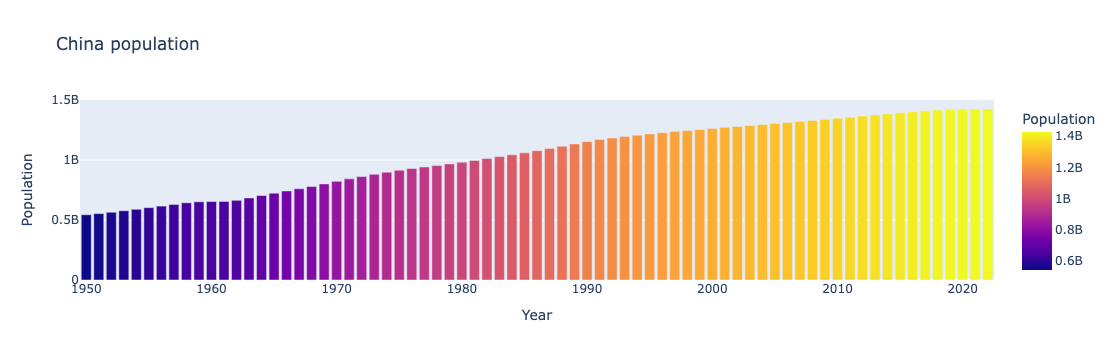

In [197]:
figure = px.bar(data, x="Year", y="Population", color="Population", title="China population")
figure.show()

<p>As illustrated in the figure above, the Chinese population has experienced sustained growth since 1950</p>

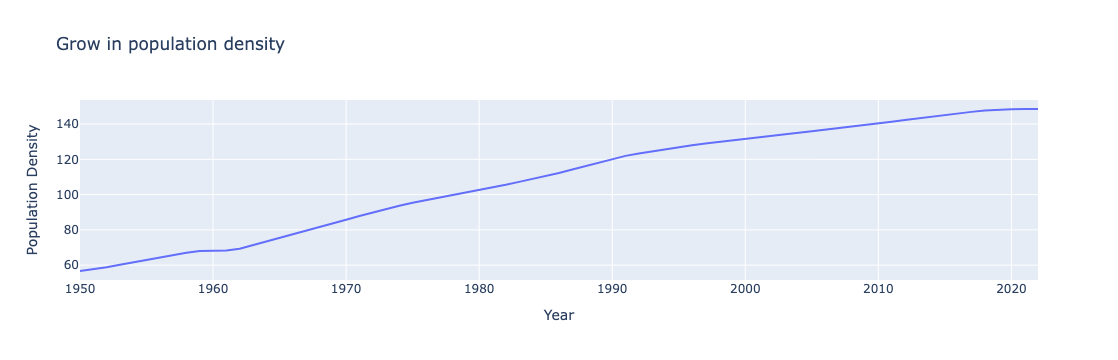

In [200]:
figure = px.line(data, x="Year", y="Population Density", title="Grow in population density")
figure.show()

<p>The plot also shows a rise in population density since 1950, meaning more people are living in a given area.</p>

<h2>Urban/rural population comparison</h2>

<p>We are to take 3 most impoartant period in history of Communist China to compare urban/rural population:</p>

<ol>
    <li>1950-1980 - first 30 years of Communist China</li>
    <li>1981-1999 - years before and after the USSR collapse</li>
    <li>2000-2022 - modern days in Chinese history</li>
</ol>

<p>Let's begin by comparing the average urban and rural populations in China using a bar chart</p>

In [206]:
f_p = data.loc[0:30, "Year":"Life Expectancy"]
s_p = data.loc[31:49, "Year":"Life Expectancy"]
t_p = data.loc[50:72, "Year":"Life Expectancy"]

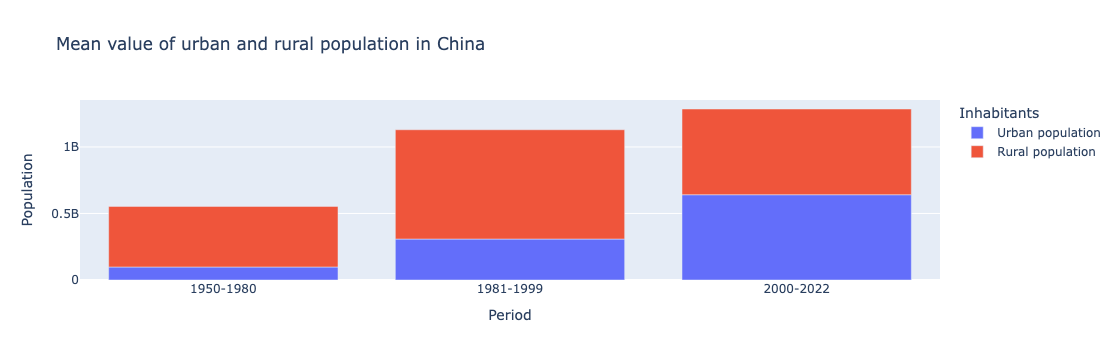

In [208]:
periods_means = pd.DataFrame(
    {
        "Period": [
            "1950-1980", 
            "1950-1980",
            "1981-1999",
            "1981-1999",
            "2000-2022",
            "2000-2022"
        ],
        "Population": [
            int(f_p["Urban Population"].mean()),
            int(f_p["Rural Population"].mean()),
            int(s_p["Urban Population"].mean()),
            int(s_p["Rural Population"].mean()),
            int(t_p["Urban Population"].mean()),
            int(t_p["Rural Population"].mean())
        ],
        "Inhabitants": [
            "Urban population",
            "Rural population",
            "Urban population",
            "Rural population",
            "Urban population",
            "Rural population"
        ]
    }
)

figure = px.bar(periods_means, x="Period", y="Population", color="Inhabitants", title="Mean value of urban and rural population in China")
figure.show()

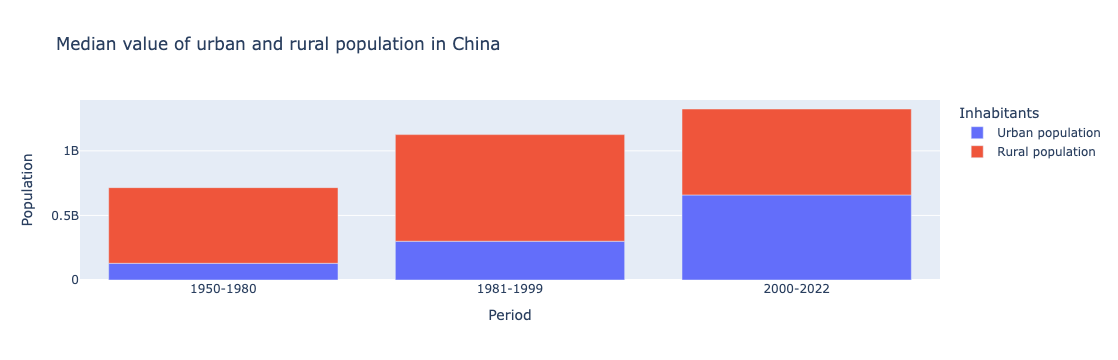

In [210]:
periods_medians = pd.DataFrame(
    {
        "Period": [
            "1950-1980", 
            "1950-1980",
            "1981-1999",
            "1981-1999",
            "2000-2022",
            "2000-2022"
        ],
        "Population": [
            int(f_p["Urban Population"].median()),
            int(f_p["Rural Population"].median()),
            int(s_p["Urban Population"].median()),
            int(s_p["Rural Population"].median()),
            int(t_p["Urban Population"].median()),
            int(t_p["Rural Population"].median())
        ],
        "Inhabitants": [
            "Urban population",
            "Rural population",
            "Urban population",
            "Rural population",
            "Urban population",
            "Rural population"
        ]
    }
)

figure = px.bar(periods_medians, x="Period", y="Population", color="Inhabitants", title="Median value of urban and rural population in China")
figure.show()

<p>It's evident that the urban population has grown since 1950, driven by people moving to cities for improved living conditions.</p>

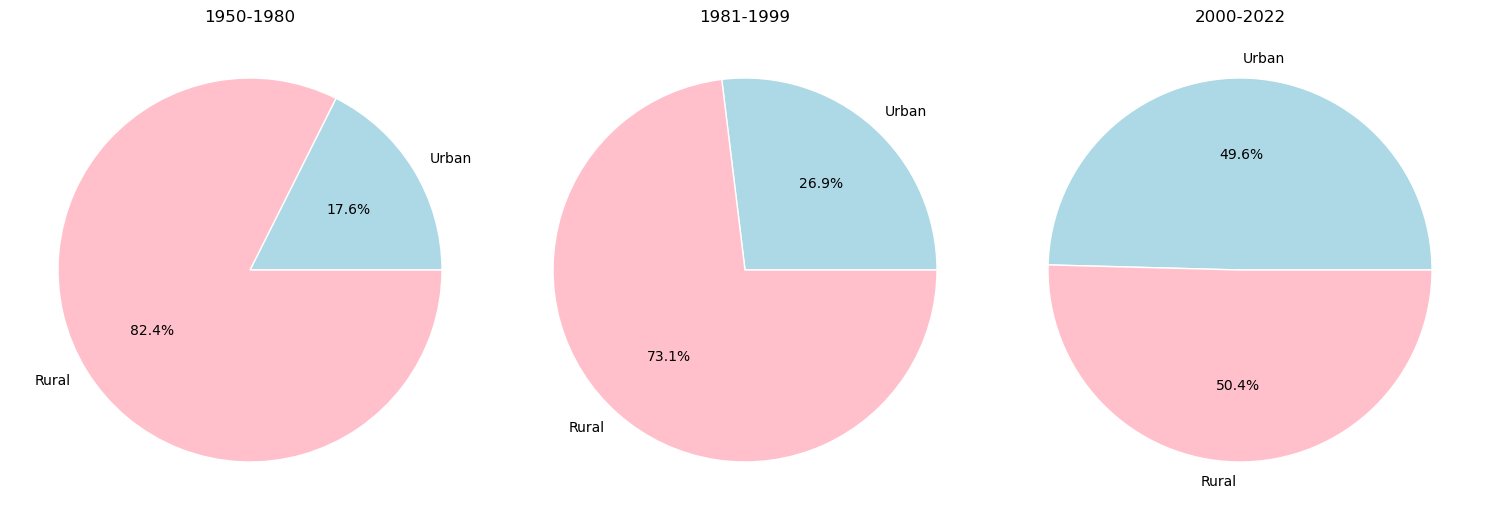

In [213]:
fig, (first_plot, second_plot, third_plot) = plt.subplots(1, 3, figsize=(15, 15))

first_plot.pie(
    [f_p["Urban Population % of Total Population"].mean(), f_p["Rural Population % of Total Population"].mean()],
    labels=['Urban', 'Rural'],
    colors=['lightblue', 'pink'],
    autopct="%1.1f%%",
    wedgeprops=dict(edgecolor='white', linewidth=1)
)
first_plot.set_title("1950-1980")

second_plot.pie(
    [s_p["Urban Population % of Total Population"].mean(), s_p["Rural Population % of Total Population"].mean()],
    labels=['Urban', 'Rural'],
    colors=['lightblue', 'pink'],
    autopct="%1.1f%%",
    wedgeprops=dict(edgecolor='white', linewidth=1)
)
second_plot.set_title("1981-1999")

third_plot.pie(
    [t_p["Urban Population % of Total Population"].mean(), t_p["Rural Population % of Total Population"].mean()],
    labels=['Urban', 'Rural'],
    colors=['lightblue', 'pink'],
    autopct="%1.1f%%",
    wedgeprops=dict(edgecolor='white', linewidth=1)
)
third_plot.set_title("2000-2022")

plt.tight_layout()
plt.show()

<p>These pie charts illustrate the urban/rural population distribution in China for specific time periods</p>

<h2>First hypothesis</h2>

<p>Let's visualize the relationship between urban population and population density in China using a scatter plot. To achieve this, we'll focus on the 'Urban Population' and 'Population Density' columns and plot them on a graph</p>

In [218]:
first_hypothesis = pd.DataFrame(
    {
        "Year": [year for year in range(1960, 2022)],
        "Urban population": data.loc[10:71, "Urban Population"],
        "Population density": data.loc[10:71, "Population Density"],
    }
)

first_hypothesis

,Year,Urban population,Population density
10,1960,108085352,68.14
11,1961,110327936,68.26
12,1962,114685540,69.23
13,1963,121162226,71.24
14,1964,127791981,73.4
...,...,...,...
67,2017,809246214,146.9
68,2018,829760595,147.61
69,2019,848982855,148.11
70,2020,866810508,148.43


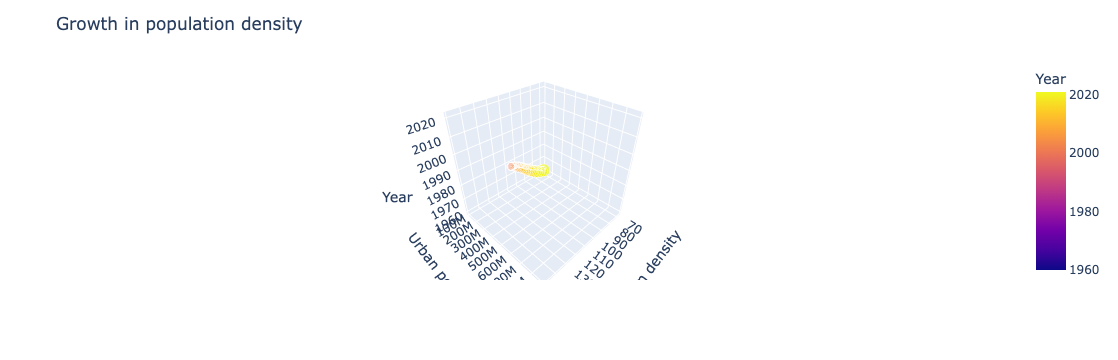

In [220]:
figure = px.scatter_3d(first_hypothesis, x="Population density", y="Urban population", z="Year", 
                       color="Year", size="Urban population")

figure.update_layout(title="Growth in population density", 
                    scene=dict(xaxis_title='Population density',
                               yaxis_title='Urban population',
                               zaxis_title='Year'))

figure.show()

<p>As expected, we see a strong relationship between urban population and population density, indicating that larger cities are more crowded.</p>

<h2>Life in China analysis</h2>

<p>First, let's look at how life expectancy in China has changed over time</p>

In [224]:
f_p_life = pd.DataFrame(
    {
        "Year": [year for year in range(1950, 1981)],
        "Period": ["1950-1980"] * 31, 
        "Life expectancy": f_p["Life Expectancy"]
    }
)

s_p_life = pd.DataFrame(
    {
        "Year": [year for year in range(1981, 2000)],
        "Period": ["1981-1999"] * 19, 
        "Life expectancy": s_p["Life Expectancy"]
    }
)

t_p_life = pd.DataFrame(
    {
        "Year": [year for year in range(2000, 2023)],
        "Period": ["2000-2022"] * 23, 
        "Life expectancy": t_p["Life Expectancy"]
    }
)

life = pd.concat([f_p_life, s_p_life, t_p_life])

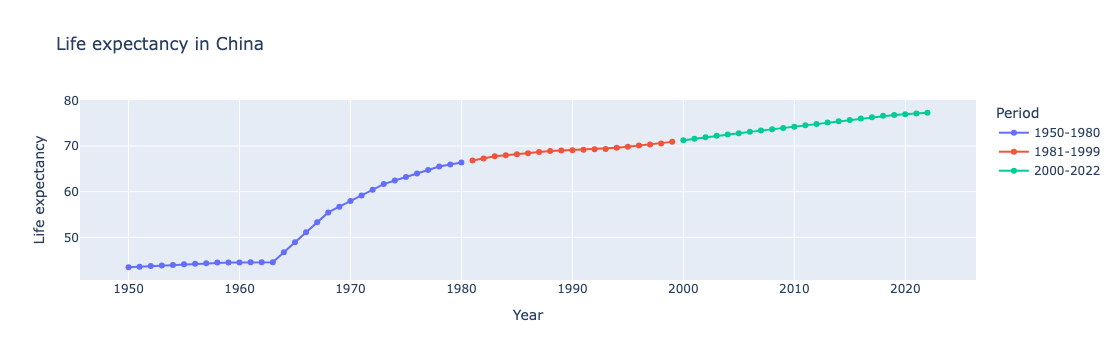

In [226]:
figure = px.line(life, x="Year", y="Life expectancy", color="Period", title="Life expectancy in China", markers=True)
figure.show()

<p>Since 1950, life expectancy in China has increased, leading to an older population</p>

In [230]:
f_p = data.loc[0:30, "Life Expectancy":"% Change in Net Migration Rate"]
s_p = data.loc[31:49, "Life Expectancy":"% Change in Net Migration Rate"]
t_p = data.loc[50:72, "Life Expectancy":"% Change in Net Migration Rate"]

In [232]:
birth = pd.DataFrame(
    {
        "Year": [year for year in range(1950, 2023)],
        "Rate": data["Birth Rate"],
        "Type": ["Birth"] * 73
    }
)

death = pd.DataFrame(
    {
        "Year": [year for year in range(1950, 2023)],
        "Rate": data["Death Rate"],
        "Type": ["Death"] * 73
    }
)

fertility_rate = pd.concat([birth, death])

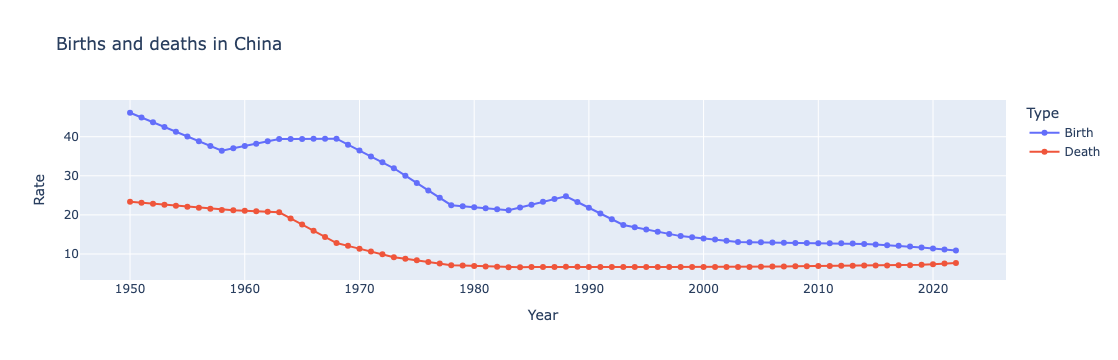

In [234]:
figure = px.line(fertility_rate, x="Year", y="Rate", color="Type", title="Births and deaths in China", markers=True)
figure.show()

<p>As we can see here, birth and death rates both almost tied for first place in 2022. This means the number of people passing away is increasing, while the number of people getting birth is decreasing.</p>

In [237]:
growth_rate = pd.DataFrame(
    {
        "Year": [year for year in range(1950, 2023)],
        "Birth rate": data["Birth Rate"],
        "Death rate": data["Death Rate"],
        "Growth Rate": (data["Birth Rate"] - data["Death Rate"]) / 10
    }
)

growth_rate

,Year,Birth rate,Death rate,Growth Rate
0,1950,46.133,23.366,2.2767
1,1951,44.921,23.106,2.1815
2,1952,43.71,22.845,2.0865
3,1953,42.498,22.585,1.9913
4,1954,41.286,22.325,1.8961
...,...,...,...,...
68,2018,11.93,7.121,0.4809
69,2019,11.673,7.261,0.4412
70,2020,11.416,7.402,0.4014
71,2021,11.159,7.542,0.3617


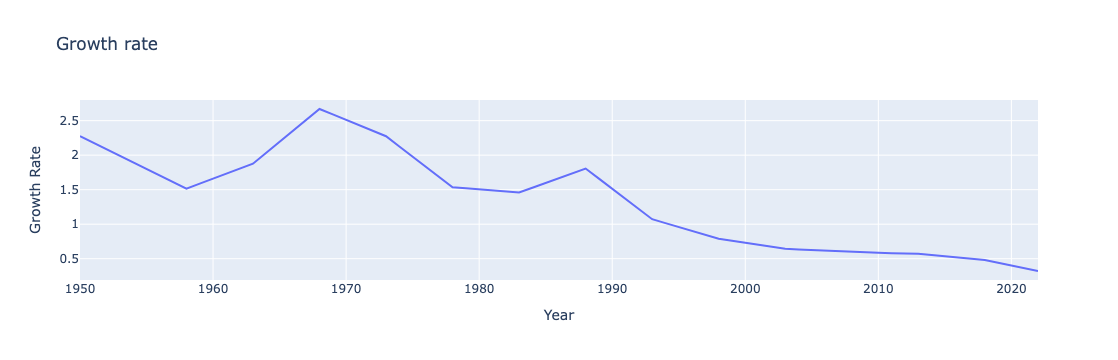

In [239]:
figure = px.line(growth_rate, x="Year", y="Growth Rate", title="Growth rate")
figure.show()

<p>It is now evident that death rate surpasses birth rate. That may be because Chinese population became so much big that its government decided to do anything to prevent this from increase.</p>

In [242]:
fertility_rate = pd.DataFrame(
    {
        "Period": ["1950-1980", "1981-1999", "2000-2022"],
        "Infant mortality rate": [
            f_p["Infant Mortality Rate"].mean(),
            s_p["Infant Mortality Rate"].mean(),
            t_p["Infant Mortality Rate"].mean()
        ],
        "Fertility rate": [
            f_p["Fertility Rate"].mean(),
            s_p["Fertility Rate"].mean(),
            t_p["Fertility Rate"].mean()
        ]
    }
)

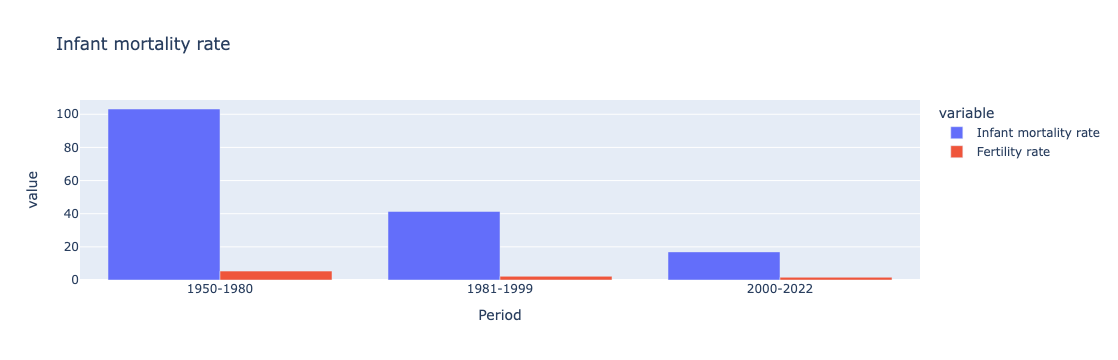

In [244]:
figure = px.bar(fertility_rate, x="Period", y=["Infant mortality rate", "Fertility rate"], title="Infant mortality rate", barmode="group")
figure.show()

<p>The plot above illustrates that, despite a decrease in infant mortality, a concurrent decline in fertility rates has resulted in a shrinking Chinese population.</p>

In [247]:
f_p_migration = pd.DataFrame(
    {
        "Year": [year for year in range(1950, 1981)],
        "Period": ["1950-1981"] * 31,
        "Migration Rate": f_p["Net Migration Rate"]
    }
)

s_p_migration = pd.DataFrame(
    {
        "Year": [year for year in range(1981, 2000)],
        "Period": ["1981-1999"] * 19,
        "Migration Rate": s_p["Net Migration Rate"]
    }
)

t_p_migration = pd.DataFrame(
    {
        "Year": [year for year in range(2000, 2023)],
        "Period": ["2000-2022"] * 23,
        "Migration Rate": t_p["Net Migration Rate"]
    }
)

migration_rate = pd.concat([f_p_migration, s_p_migration, t_p_migration])

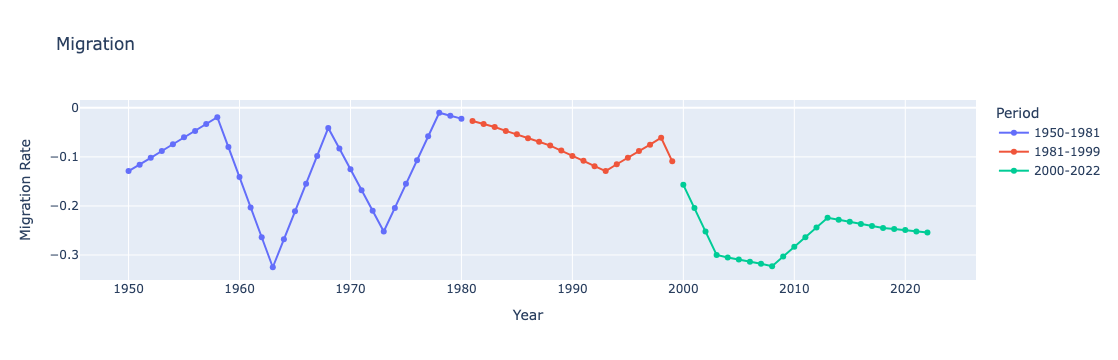

In [249]:
figure = px.line(migration_rate, x="Year", y="Migration Rate", color="Period", title="Migration", markers=True)
figure.show()

<p>The graph shows that fewer people are moving to China than are leaving. This is another reason why the population is decreasing.</p>

<h2>Second hypothesis</h2>

<p>Let's see if China's higher life expectancy correlates with a lower fertility rate. To accomplish this, we shall compare life expectancy with both general fertility rate and growth rate</p>

In [254]:
first_comparison = pd.DataFrame(
        {
            "Life expectancy": data["Life Expectancy"],
            "Growth Rate": (data["Birth Rate"] - data["Death Rate"]) / 10
        }
    )

second_comparison = pd.DataFrame(
    {
        "Life expectancy": data["Life Expectancy"],
        "Fertility rate": data["Fertility Rate"]
    }
)

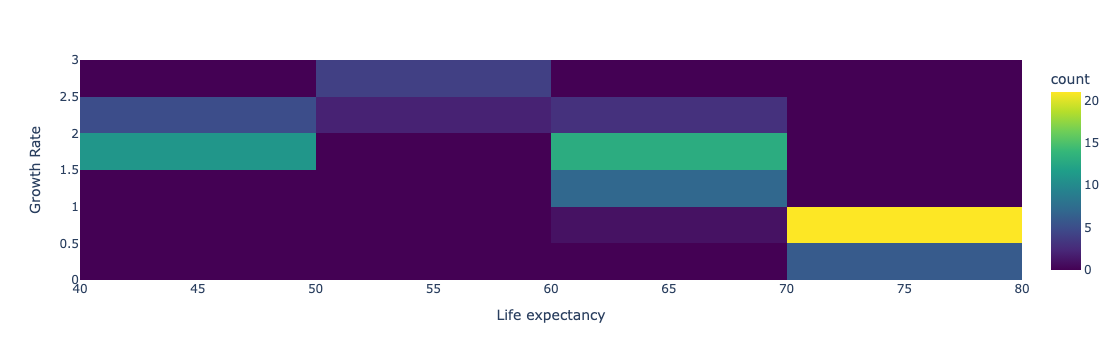

In [256]:
figure = px.density_heatmap(first_comparison, x="Life expectancy", y="Growth Rate", color_continuous_scale="Viridis")
figure.show()

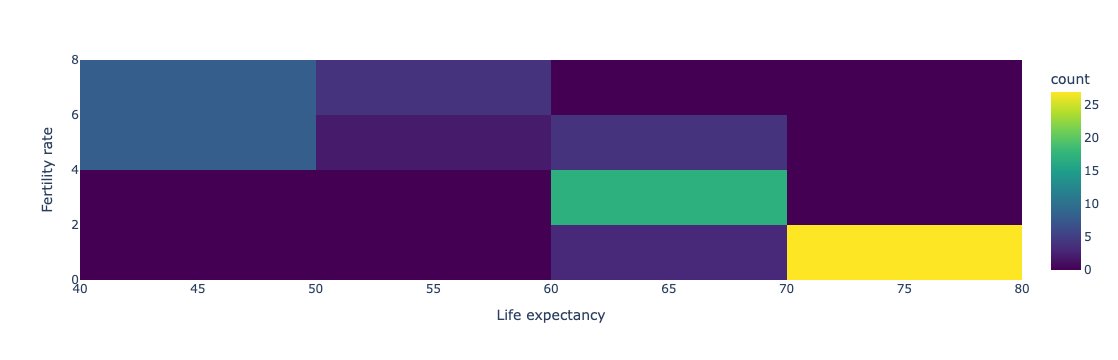

In [258]:
figure = px.density_heatmap(second_comparison, x="Life expectancy", y="Fertility rate", color_continuous_scale="Viridis")
figure.show()

<p>In conclusion, as China's population ages and life expectancy increases, birth rates are declining</p>